In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('C:/Users/user/Data Science/train_u6lujuX_CVtuZ9i (1).csv')

In [2]:
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df=df.dropna()

In [4]:
df.replace(to_replace='3+',value=4,inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import root_mean_squared_error,accuracy_score
import seaborn as sns


<Axes: xlabel='Education', ylabel='count'>

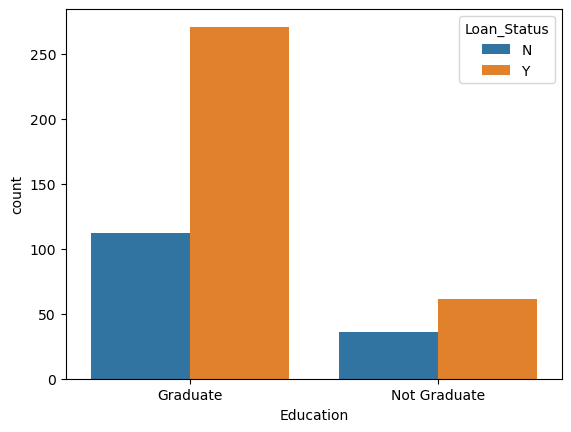

In [6]:
sns.countplot(x='Education',hue='Loan_Status',data=df)


<Axes: xlabel='Married', ylabel='count'>

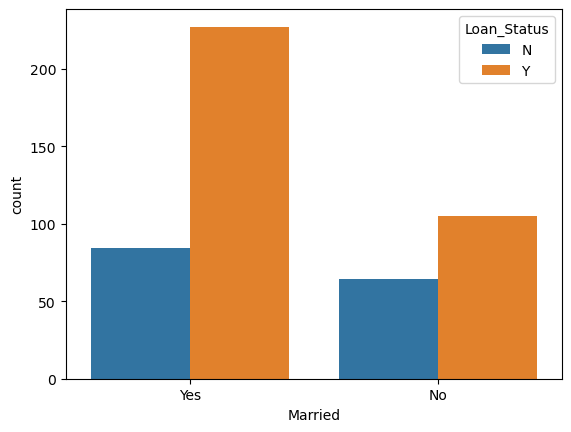

In [7]:
sns.countplot(x='Married',hue='Loan_Status',data=df)


In [8]:
df.replace({'Gender':{'Male':1,'Female':0},
            'Married':{'Yes':1,'No':0},
            'Self_Employed':{'Yes':1,'No':0},
            'Loan_Status':{'Y':1,'N':0},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
            'Education':{'Graduate':1,'Not Graduate':0}},
            inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8540\4090027382.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':1,'Female':0},


In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [10]:
df.Dependents.value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [11]:
X=df.drop(columns=['Loan_ID','Loan_Status'])
y=df['Loan_Status']

In [12]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2,stratify=y)
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [14]:
classifier=svm.SVC(kernel='linear')

In [15]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [16]:
X_train_prediction=classifier.predict(X_train)

In [17]:
np.sqrt(root_mean_squared_error(X_train_prediction,y_train))

0.6698983011830044

In [18]:
accuracy_score(X_train_prediction,y_train)

0.7986111111111112

In [19]:
X_test_prediction=classifier.predict(X_test)

In [21]:
np.sqrt(root_mean_squared_error(X_test_prediction,y_test))

0.6389431042462724

In [20]:
accuracy_score(X_test_prediction,y_test)

0.8333333333333334

In [24]:
pd.DataFrame({'Asl':y_train,'Bashorat':X_train_prediction}).head(20)

,Asl,Bashorat
122,1,0
498,1,1
144,1,1
217,1,1
362,1,1
341,0,1
283,1,1
263,1,1
66,0,0
281,1,1
